# Report 3
## BIO206 2023 - Lucio Vinicius <br>
## solved by Pascal Bärtschi <br>

For all questions, in addition to your answers (in markdown cells), provide each simulation code as well in a separate code cell, so that I can verify that they are working just by pressing Run. <br>

**Deadline for submission**: Wednesday 12 April, 18:00. 

___

* **Question 1. Segregation** <br>

Adapt ABM 1 - Segregation, so that instead of two, you simulate *three* types of agents in a town, with potentially different homophyly thresholds (=required fraction of same-type individuals in their neighbourhood). <br> <br>
Starting from an initially random distribution, populations show differences in homophyly depending on the scenarios: <br> <br>
**Scenario 1)** The three types are moderately tolerant of other types (all thresholds = 0.5) <br>
**Scenario 2)** The three types are intolerant (all thresholds = 0.65) <br>
**Scenario 3)** The three types are tolerant (all thresholds = 0.15)  <br>
**Scenario 4)** Only one of the three types is intolerant (thresholds = 0.15, 0.15, 0.65) <br>
**Scenario 5)** Only one type is tolerant (threshold = 0.15, 0.65, 0.65) <br>

For each of the scenarios above:  
* Insert a figure with the result (first save the figure at the end of each of your simulations using the Save buttom in the simulation window. Place the saved figure in the same folder as your Jupyter notebook. Then insert figure in a *markdown* cell, using the simple code provided in the next cell). <br> 
* Discuss whether the outcome is: i) no segregation, ii) partial segregation, iii) total segregation of types. 
* Interpret the results, or why the result was i), ii) or iii).<br>

Notes: <br>
Run simulations for a *maximum* of 100,000 steps, although for some scenarios fewer than 5,000 are required to show a pattern.<br>
Run each scenario 2-3 times to make sure of the pattern, but only present one figure for each. <br>
Use n=1000 and r = 0.1 as in the original ABM 1.


In [85]:
# optimized code with numba library to compile loops directly in machine language
# simulation of 100000 steps takes around 1 second, tot time: 5 seconds

import numpy as np
from numba import jit
import matplotlib.pyplot as plt
import time

# global params

n = 1000 # number of agents
r = 0.1 # neighbourhood radius

@jit(nopython = True)
def update(axy, atype, thresh):
    # choose random agent
    i = np.random.randint(0, n-1)
    # neighbour defined within given radius
    mask_nb = np.where(((axy[i, 0] - axy[:, 0]) ** 2 + (axy[i, 1] - axy[:, 1]) ** 2) < r**2)[0]
    # if foreigner ratio in neighbours < thresh
    q = (len(np.where(atype[i] == atype[mask_nb])[0])-1) / len(mask_nb) # -1 to exclude agent itself
    # print(q)
    # check whether below threshold
    if q < thresh[atype[i]]:
        # assign new position
        axy[i] = np.random.uniform(0, 1 ,size=2)

    # xy_list.append(axy)
    return axy # ,xy_list

@jit(nopython = True)
def sim(steps, thresh):

    # initialize agents
    axy = np.random.uniform(0, 1 , size = (n, 2))
    atype  = np.random.randint(0, 3, size = n)
    # xy_list = [axy.copy()]

    # run sim
    for i in range(steps):
        # update system
        axy = update(axy, atype, thresh)
        # xy_list.append(axy.copy())

    return axy, atype



thresholds = [(0.5, 0.5, 0.5),
              (0.65, 0.65, 0.65),
              (0.15, 0.15, 0.15),
              (0.15, 0.15, 0.65),
              (0.15, 0.65, 0.65)]
              # the lower the thresh the higher the tolerance
simsteps = int(1e5)

for thresh in thresholds:
    # time
    start = time.time()
    # sim
    axy, atype = sim(simsteps, thresh)
    stop = time.time()

    print(f"Time for {thresh}: {stop-start} seconds for {simsteps} steps")


    # plotting after x simsteps
    fig, ax = plt.subplots(1, 1)
    ax.scatter(x = axy[:, 0],
                y = axy[:, 1],
                c = atype)

    label = f"n{n}_r{r}_thresh{thresh}_steps{simsteps}"
    ax.set_title(label.replace("_", " "))


    plt.savefig(label + ".png")
    plt.close()

    print("Saved: " + label + ".png\n")

Time for (0.5, 0.5, 0.5): 0.5537831783294678 seconds for 100000 steps
Saved: n1000_r0.1_thresh(0.5, 0.5, 0.5)_steps100000.png

Time for (0.65, 0.65, 0.65): 0.23650479316711426 seconds for 100000 steps
Saved: n1000_r0.1_thresh(0.65, 0.65, 0.65)_steps100000.png

Time for (0.15, 0.15, 0.15): 0.22289109230041504 seconds for 100000 steps
Saved: n1000_r0.1_thresh(0.15, 0.15, 0.15)_steps100000.png

Time for (0.15, 0.15, 0.65): 0.23433518409729004 seconds for 100000 steps
Saved: n1000_r0.1_thresh(0.15, 0.15, 0.65)_steps100000.png

Time for (0.15, 0.65, 0.65): 0.23697996139526367 seconds for 100000 steps
Saved: n1000_r0.1_thresh(0.15, 0.65, 0.65)_steps100000.png



# a)
<img src="n1000_r0.1_thresh(0.5, 0.5, 0.5)_steps100000.png">

The final distribution of the agents implies total segregation. Even though the tolerance is moderate and the types do not relocate every time they are checked, the types do still prefer to be with their own type. This leads to steadily increasing segregation into multiple camps per type over the simulation, meaning that the longer the simulation goes the more extreme the types will be split with this tolerance



# b)
<img src="n1000_r0.1_thresh(0.65, 0.65, 0.65)_steps100000.png">

The final distribution of the agents implies no segregation, which is against my personal intuition. However, because the tolerance is low, the agents relocate every time they are checked and are never satisfied with their neighbourhood. This way they keep randomly relocating, but do never aggregate nor settle in a camp as in 1a), as every agent keeps relocating.



# c)
<img src="n1000_r0.1_thresh(0.15, 0.15, 0.15)_steps100000.png">

The final distribution of the agents implies no segregation, which is intuitive having high tolerance. The agents do not really care whether they're neighbourhood consists only of their own type. Thus, they hardly relocate and stay in the mixed neighbourhood.

# d)
<img src="n1000_r0.1_thresh(0.15, 0.15, 0.65)_steps100000.png">

The final distribution of the agents implies partial segregation. This is an interesting result, because we see that the two types with high tolerance still display the mixed behaviour as in 1c), while the intolerant agents do separate into clusters consisting only of their own. This means that tolerant types do normally stay, and the intolerant ones want to relocate until being next to their own type. This leads to the intolerant ones being left densely packed, while the tolerant one have lots of living space!

# e)
<img src="n1000_r0.1_thresh(0.15, 0.65, 0.65)_steps100000.png">

The final distribution of the agents implies complete segregation. As in 1d) the intolerant agents separate into clusters of their own, while tolerant ones stay there they are. But because there are now two intolerant strains which accumulate in random areas, the tolerant ones are also on their own, as there are only three agent types. As in 1d) the intolerant ones are densely packed and tolerant ones have plenty of space.



* **Question 2. Cultural evolution** <br>

Adapt ABM 5 - Cultural evolution.  

**1)** Modify the original code so that instead of transferring a new tool only to close kin, both partners transmit new tools to **all** their neighbours. 

**2)** Modify original code so that instead of the Agta network, you play the game with a *complete* or fully connected network of the same size. Both partners transmit findings to all their neighbours. <br>
(Notes: to create a complete graph of size n, use *nx.complete_graph(n)* with NetworkX. <br>
You have to remove selection of playing partner based on weights of links, since the complete graph has no weigths. Select neighbour randomly.)

**3)** Modify original code so that instead of the Agta network, you play the game with a *random network* of the same size and density (see code from Intro to NetworkX notebook). As the probability *p* of an edge in the random network, use the density of the Agta network. Also transmit fidings to all neighbours. <br>

For each of the three cases above, run 100 simulations. Plot the histogram with distribution of number of rounds until superdrug was discovered, and mean number of rounds.

**4)** Compare the results from the three scenarios. Is there evidence that some scenarios may accelerate or slow down the discovery of a superdrug? Discuss possible reasons.

In [86]:
import numpy as np
from numba import jit
import matplotlib.pyplot as plt
import random as rd
import networkx as nx
from progressbar import ProgressBar

# general data loading and extraction
net = 'agtanet.txt'

##### Case 1

Sim:100% (100 of 100) |##################| Elapsed Time: 0:00:29 ETA:  00:00:00

Simulations =  100
Mean time to discovery of C1/C2 =  57.09 rounds


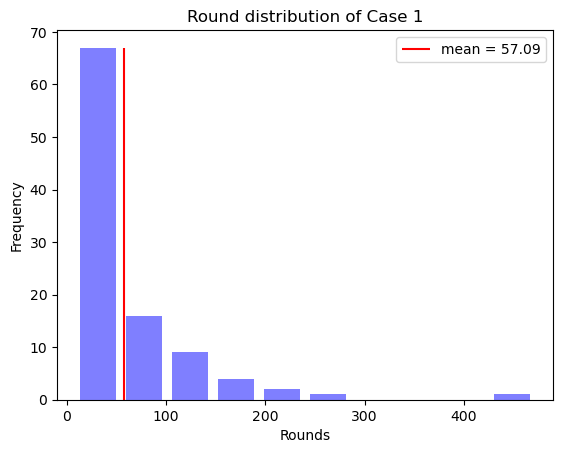

In [28]:
sims = 100
sim_duration = [] # to store each simulation duration
bar = ProgressBar(max_value = sims, prefix = "Sim:")

# beginning of simulations
for i in range(sims):

    # network G has already been created
    G = nx.read_weighted_edgelist(net, nodetype = int)

    matrix_node_tools=[[0]*6 + [-1]*8 for i in range (len(G))]
    fitness_values = [6, 8, 10, 6, 8, 10, 30, 30, 60, 60, 120, 120, 300, 300] # each column has a value
    innovations_dict = {(0, 1, 2): 6,
                 (3, 4, 5): 7,
                 (0, 4, 6): 8,
                 (1, 2, 7): 9,
                 (4, 5, 8): 10,
                 (1, 3, 9): 11,
                 (8, 10, 11): 12,
                 (9, 10, 11): 13}

    rounds=10000
    stop_sim=0
    for epoch in range(rounds):
        random_node_list = rd.sample(range(len(G)), len(G))
        for node in random_node_list:
            neighbour_list = []
            for neighbour in G[node]:
                for times in range(int(G[node][neighbour]['weight'])):
                    neighbour_list.append(neighbour)
            selected_neighbour = rd.choice(neighbour_list)

            ingredients_node=np.where(np.array(matrix_node_tools[node])>-1)[0]
            ingredients_neighbour=np.where(np.array(matrix_node_tools[selected_neighbour])>-1)[0]

            node_tools=[]
            for tool in ingredients_node:
                for times in range(fitness_values[tool]):
                    node_tools.append(tool)
            node_tool_1, node_tool_2 = rd.sample(node_tools, 2)

            neighbour_tools=[]
            for tool in ingredients_neighbour:
                for times in range(fitness_values[tool]):
                    neighbour_tools.append(tool)
            neighbour_tool = rd.choice(neighbour_tools)

            triad = [node_tool_1, node_tool_2, neighbour_tool]
            triad = tuple(sorted(triad))
            new_tool = innovations_dict.get(triad,-1)


            if new_tool > -1: # if a new drug was created (6, 7 or 8 etc)
                # check if node and neighbour already have invented tool
                have_new_tool = -1 # we need this later
                if matrix_node_tools[node][new_tool] == -1: # if position (i = node, j = new tool) in matrix is absent
                    have_new_tool = 1
                    matrix_node_tools[node][new_tool] = epoch + 1 # node gains new tools, replace -1 with round of discovery
###############################################################################################################
                    for node_next in G[node]: # now use matrix G_closekin to identify all close kin of node
                        matrix_node_tools[node_next][new_tool] = epoch + 1 # tranmits new tool to all neighbours
################################################################################################################

                if matrix_node_tools[selected_neighbour][new_tool] == -1: #check if selected neighbour has tool
                    have_new_tool = 1
                    matrix_node_tools[selected_neighbour][new_tool]= epoch + 1 # neighbours gains new tool
###############################################################################################################
                    for neighbour_kin in G[selected_neighbour]:
                        matrix_node_tools[neighbour_kin][new_tool] = epoch+ 1
###############################################################################################################

                if have_new_tool == 1: #if either node or neighbour received the new tool
                    #print(new_tool, epoch + 1, node, selected_neighbour)
                    if new_tool in [12,13]: # BUT if the new tool is a superdrug C1=12 or C2=13
                        stop_sim=1 # simulations ends
                        sim_duration.append(epoch + 1)
            if stop_sim==1:
                break
        if stop_sim==1:
            break

    bar.update(i+1)

hist, _, _ = plt.hist(sim_duration, facecolor='b', alpha=.5, rwidth=.8)
mean = np.mean(sim_duration)
plt.vlines(x = mean, ymin = min(hist), ymax = max(hist), label = f"mean = {mean}", colors = "red")
plt.legend(loc = "upper right")
plt.title("Round distribution of Case 1")
plt.xlabel("Rounds")
plt.ylabel("Frequency")
plt.savefig("2hist_case1.png")
# plt.show()
print("Simulations = ", sims)
print("Mean time to discovery of C1/C2 = ", mean, "rounds")

##### Case 2

Sim:100% (100 of 100) |##################| Elapsed Time: 0:00:43 ETA:  00:00:00

Simulations =  100
Mean time to discovery of C1/C2 =  158.32 rounds


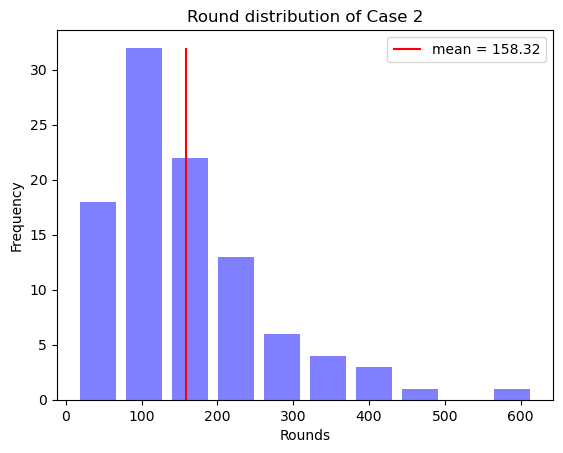

In [29]:
sims = 100
sim_duration = []  # to store each simulation duration
bar = ProgressBar(max_value = sims, prefix = "Sim:")

# beginning of simulations
for i in range(sims):
    # complete graph
    C = nx.complete_graph(53)

    matrix_node_tools = [[0] * 6 + [-1] * 8 for i in range(len(C))]
    fitness_values = [6, 8, 10, 6, 8, 10, 30, 30, 60, 60, 120, 120, 300, 300]  # each column has a value
    innovations_dict = {(0, 1, 2): 6,
                        (3, 4, 5): 7,
                        (0, 4, 6): 8,
                        (1, 2, 7): 9,
                        (4, 5, 8): 10,
                        (1, 3, 9): 11,
                        (8, 10, 11): 12,
                        (9, 10, 11): 13}

    rounds = 10000
    stop_sim = 0
    for epoch in range(rounds):
        random_node_list = rd.sample(range(len(G)), len(G))
        for node in random_node_list:
            # select from C
            selected_neighbour = rd.choice(list(C[node]))

            ingredients_node = np.where(np.array(matrix_node_tools[node]) > -1)[0]
            ingredients_neighbour = np.where(np.array(matrix_node_tools[selected_neighbour]) > -1)[0]

            node_tools = []
            for tool in ingredients_node:
                for times in range(fitness_values[tool]):
                    node_tools.append(tool)
            node_tool_1, node_tool_2 = rd.sample(node_tools, 2)

            neighbour_tools = []
            for tool in ingredients_neighbour:
                for times in range(fitness_values[tool]):
                    neighbour_tools.append(tool)
            neighbour_tool = rd.choice(neighbour_tools)

            triad = [node_tool_1, node_tool_2, neighbour_tool]
            triad = tuple(sorted(triad))
            new_tool = innovations_dict.get(triad, -1)

            # until here, similar to previous cell

            if new_tool > -1:  # if a new drug was created (6, 7 or 8 etc)
                # check if node and neighbour already have invented tool
                have_new_tool = -1  # we need this later
                if matrix_node_tools[node][new_tool] == -1:  # if position (i = node, j = new tool) in matrix is absent
                    have_new_tool = 1
                    matrix_node_tools[node][
                        new_tool] = epoch + 1  # node gains new tools, replace -1 with round of discovery
                    for node_next in C[node]:  # now use matrix G_closekin to identify all close kin of node
                        matrix_node_tools[node_next][new_tool] = epoch + 1  # tranmits new tool to all kin

                if matrix_node_tools[selected_neighbour][new_tool] == -1:  #check if selected neighbour has tool
                    have_new_tool = 1
                    matrix_node_tools[selected_neighbour][new_tool] = epoch + 1  # neighbours gains new tool
                    for neighbour_next in C[selected_neighbour]:
                        matrix_node_tools[neighbour_next][new_tool] = epoch + 1

                if have_new_tool == 1:  #if either node or neighbour received the new tool
                    #print(new_tool, epoch + 1, node, selected_neighbour)
                    if new_tool in [12, 13]:  # BUT if the new tool is a superdrug C1=12 or C2=13
                        stop_sim = 1  # simulations ends
                        sim_duration.append(epoch + 1)
            if stop_sim == 1:
                break
        if stop_sim == 1:
            break
    bar.update(i+1)

hist, _, _ = plt.hist(sim_duration, facecolor='b', alpha=.5, rwidth=.8)
mean = np.mean(sim_duration)
plt.vlines(x = mean, ymin = min(hist), ymax = max(hist), label = f"mean = {mean}", colors = "red")
plt.legend(loc = "upper right")
plt.title("Round distribution of Case 2")
plt.xlabel("Rounds")
plt.ylabel("Frequency")
plt.savefig("2hist_case2.png")
# plt.show()
print("Simulations = ", sims)
print("Mean time to discovery of C1/C2 = ", mean, "rounds")

##### Case 3

Sim:100% (100 of 100) |##################| Elapsed Time: 0:00:32 ETA:  00:00:00

Simulations =  100
Mean time to discovery of C1/C2 =  63.71 rounds


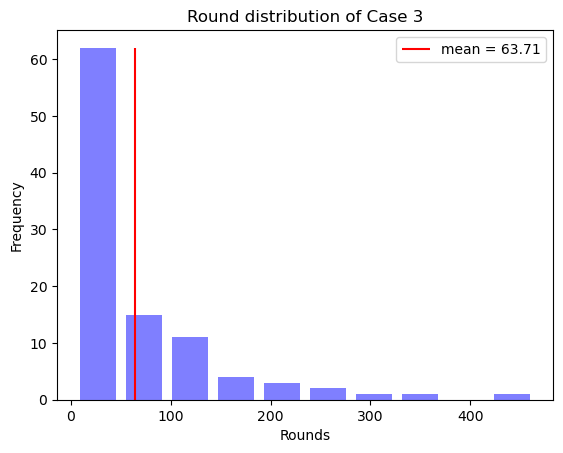

In [31]:
sims = 100
sim_duration = [] # to store each simulation duration
sizeG = len(G)
degrees = sum(dict(G.degree()).values()) / sizeG / (sizeG-1) # first calcs mean degree, then probability to bind to random node
bar = ProgressBar(max_value = sims, prefix = "Sim:")


# beginning of simulations
for i in range(sims):
    R = nx.erdos_renyi_graph(sizeG,degrees)

    matrix_node_tools=[[0]*6 + [-1]*8 for i in range (len(G))]
    fitness_values = [6, 8, 10, 6, 8, 10, 30, 30, 60, 60, 120, 120, 300, 300] # each column has a value
    innovations_dict = {(0, 1, 2): 6,
                 (3, 4, 5): 7,
                 (0, 4, 6): 8,
                 (1, 2, 7): 9,
                 (4, 5, 8): 10,
                 (1, 3, 9): 11,
                 (8, 10, 11): 12,
                 (9, 10, 11): 13}

    rounds=10000
    stop_sim=0
    for epoch in range(rounds):
        random_node_list = rd.sample(range(len(G)), len(G))
        for node in random_node_list:
            neighbour_list = []
            for neighbour in G[node]:
                for times in range(int(G[node][neighbour]['weight'])):
                    neighbour_list.append(neighbour)
            selected_neighbour = rd.choice(neighbour_list)

            ingredients_node=np.where(np.array(matrix_node_tools[node])>-1)[0]
            ingredients_neighbour=np.where(np.array(matrix_node_tools[selected_neighbour])>-1)[0]

            node_tools=[]
            for tool in ingredients_node:
                for times in range(fitness_values[tool]):
                    node_tools.append(tool)
            node_tool_1, node_tool_2 = rd.sample(node_tools, 2)

            neighbour_tools=[]
            for tool in ingredients_neighbour:
                for times in range(fitness_values[tool]):
                    neighbour_tools.append(tool)
            neighbour_tool = rd.choice(neighbour_tools)

            triad = [node_tool_1, node_tool_2, neighbour_tool]
            triad = tuple(sorted(triad))
            new_tool = innovations_dict.get(triad,-1)

            # until here, similar to previous cell

            if new_tool > -1: # if a new drug was created (6, 7 or 8 etc)
                # check if node and neighbour already have invented tool
                have_new_tool = -1 # we need this later
                if matrix_node_tools[node][new_tool] == -1: # if position (i = node, j = new tool) in matrix is absent
                    have_new_tool = 1
                    matrix_node_tools[node][new_tool] = epoch + 1 # node gains new tools, replace -1 with round of discovery
                    for node_kin in R[node]: # now use matrix G_closekin to identify all close kin of node
                        matrix_node_tools[node_kin][new_tool] = epoch + 1 # tranmits new tool to all kin

                if matrix_node_tools[selected_neighbour][new_tool] == -1: #check if selected neighbour has tool
                    have_new_tool = 1
                    matrix_node_tools[selected_neighbour][new_tool]= epoch + 1 # neighbours gains new tool
                    for neighbour_next in R[selected_neighbour]:
                        matrix_node_tools[neighbour_kin][new_tool] = epoch+ 1

                if have_new_tool == 1: #if either node or neighbour received the new tool
                    #print(new_tool, epoch + 1, node, selected_neighbour)
                    if new_tool in [12,13]: # BUT if the new tool is a superdrug C1=12 or C2=13
                        stop_sim=1 # simulations ends
                        sim_duration.append(epoch + 1)
            if stop_sim==1:
                break
        if stop_sim==1:
            break

    bar.update(i+1)

hist, _, _ = plt.hist(sim_duration, facecolor='b', alpha=.5, rwidth=.8)
mean = np.mean(sim_duration)
plt.vlines(x = mean, ymin = min(hist), ymax = max(hist), label = f"mean = {mean}", colors = "red")
plt.legend(loc = "upper right")
plt.title("Round distribution of Case 3")
plt.xlabel("Rounds")
plt.ylabel("Frequency")
plt.savefig("2hist_case3.png")
# plt.show()
print("Simulations = ", sims)
print("Mean time to discovery of C1/C2 = ", mean, "rounds")

##### Discussion


<img src="2hist_case1.png"> <return>
<img src="2hist_case2.png"> <return>
<img src="2hist_case3.png">


In [82]:
# draw acta network
edges = [(u, v) for (u, v) in G.edges()]
weights = [d['weight']*0.1 for (u, v, d) in G.edges(data=True)]

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=2) # k for spacier display
nx.draw_networkx_nodes(G, pos, node_size=300)# draw nodes
nx.draw_networkx_edges(G, pos, edgelist=edges, width=weights)# draw edges
nx.draw_networkx_labels(G, pos, font_size=20)# draw labels
plt.title("Visualization of Agta-Network with edge weigths")
plt.savefig("agtanet_visualization.png")
plt.close()

Comparing the histograms with the simulation rounds distribution until the superdrugs have been discovers leads to two direct conclusions:
* Having a fully connected network slows down the discovery of the superdrug compared to the random and Agta network.
* Thus, the Agta network has more properties with a random network of similar size and degree-probability than with a fully conncted network.

Intuitively, we know that isolation is bad for fast cultural evolution and that some interconnection facilitates cultural evolution. However, complete connectivity of networks may reduce diversity due to fast transmission of popular solutions, eliminating diversity required for cultural recombination (Derex and Boyd 2016). Thus. the speed of cultural is higher in partially than fully connected networks. A good example that exists in the real network is the model of small world networks that optimize the tradeoff between mean path length and cliquishness. This means easy spread of information, while diversity in the cliques remains high.
<return>
<img src="agtanet_visualization.png">
<return>
Visually analyzing the structure of the Agta network I see its similarity with a small world network. The random network originates from the parameters of the Agta network and will thus have similar structure. There are strong bonds within cliques and some weaker, but important ones between cliques. The weights of the edges do also play a role, as the random network without weights needs 6 rounds more to discover the superdrug on average.
In closing, I can conclude that the partially connected networks, in small world network style, show faster transmission than complete connected networks. Thus, important roles play cliquishness and mean path length of the network to keep diversity, but fast information exchange. This little simulation study confirms findings by Derex and Boyd 2016 and underlines the importance of small networks in studying the cultural and social evolution of our species.
